# CS182_HW4_Coding.pdf is the instruction of this part.

In [4]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# MNIST data

In [5]:
data_filename = 'data/images.mat'
data = scipy.io.loadmat(data_filename)
data = data['train_images']

## Q1

In [16]:
import random
from tqdm import tqdm

cluster_res = []

def KMeans(data, k, max_iter=20, stop_threshold=0.01):
    centers = [data[:, :, np.random.randint(0, data.shape[2])] for _ in range(k)]
    for _ in tqdm(range(max_iter)):
        clusters = [[] for _ in range(k)]
        for i in range(data.shape[2]):
            distances = [np.linalg.norm(data[:, :, i] - center) for center in centers]
            clusters[np.argmin(distances)].append(data[:, :, i])
        centers = [np.mean(cluster, axis=0) for cluster in clusters]
        if np.mean([np.linalg.norm(centers[i] - centers[i-1]) for i in range(1, k)]) < stop_threshold:
            break
    return centers

In [17]:
cluster_res.append(KMeans(data, 5))

100%|██████████| 20/20 [00:23<00:00,  1.19s/it]


In [18]:
cluster_res.append(KMeans(data, 10))

100%|██████████| 20/20 [00:42<00:00,  2.15s/it]


In [19]:
cluster_res.append(KMeans(data, 20))

100%|██████████| 20/20 [01:21<00:00,  4.07s/it]


## Q2

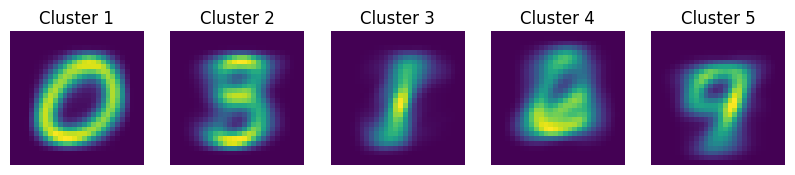

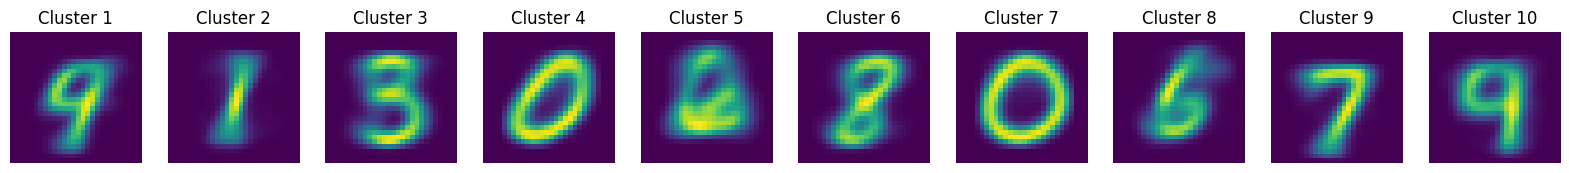

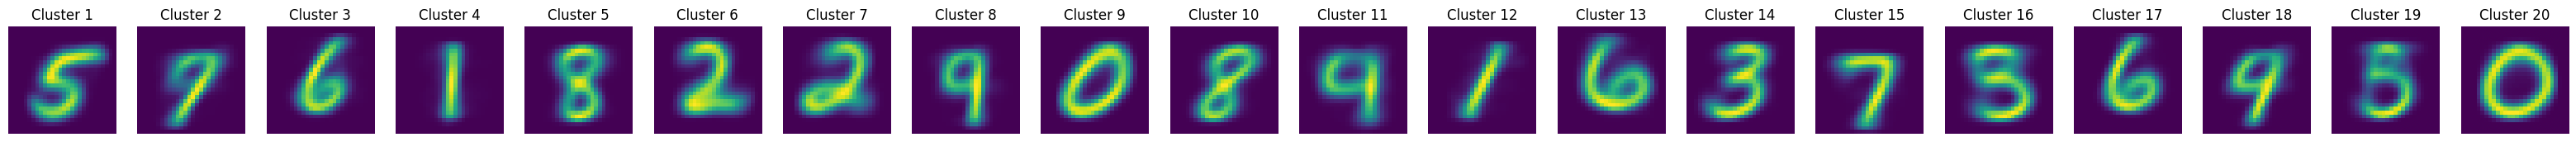

In [27]:
fig, axs = plt.subplots(1, 5, figsize=(10, 2.5))
for i in range(5):
    axs[i].imshow(cluster_res[0][i])
    axs[i].set_title('Cluster {}'.format(i+1))
    axs[i].axis('off')

fig, axs = plt.subplots(1, 10, figsize=(20, 2.5))
for i in range(10):
    axs[i].imshow(cluster_res[1][i])
    axs[i].set_title('Cluster {}'.format(i+1))
    axs[i].axis('off')

fig, axs = plt.subplots(1, 20, figsize=(40, 2.5))
for i in range(20):
    axs[i].imshow(cluster_res[2][i])
    axs[i].set_title('Cluster {}'.format(i+1))
    axs[i].axis('off')

plt.show()